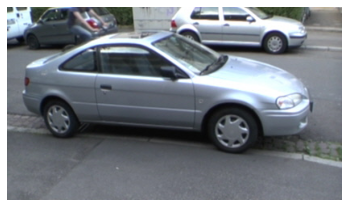

In [1]:
import matplotlib.pyplot as plt
from PIL import Image

# Open the thumbnail image
img = Image.open('Cars\car001.tmb')

# Display the image using matplotlib
plt.imshow(img)
plt.axis('off')
plt.show()


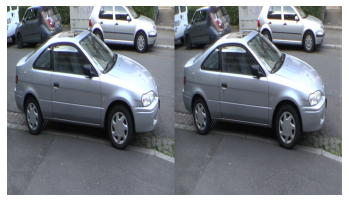

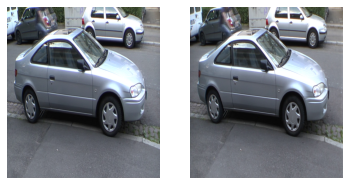

In [2]:
import cv2, os

# Read the video file
video = cv2.VideoCapture('Cars\car001.m2ts')

# Read the first frame
ret, frame = video.read()

# Convert the frame from BGR to RGB
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

# Display the first frame
plt.imshow(frame_rgb)
plt.axis('off')
plt.show()

# Split the frame along the center line
height, width, _ = frame.shape
split_line = width // 2
left_frame = frame[:, :split_line, :]
right_frame = frame[:, split_line:, :]

# Convert the left and right frames from BGR to RGB
left_frame_rgb = cv2.cvtColor(left_frame, cv2.COLOR_BGR2RGB)
right_frame_rgb = cv2.cvtColor(right_frame, cv2.COLOR_BGR2RGB)

# Display the left and right frames
fig, axes = plt.subplots(1, 2)
axes[0].imshow(left_frame_rgb)
axes[0].axis('off')
axes[1].imshow(right_frame_rgb)
axes[1].axis('off')
plt.show()


In [3]:
def check_dir(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)

In [4]:
from tqdm import tqdm

# Directory path containing the m2ts videos
directory = 'Cars'

check_dir(os.path.join(directory, 'splited'))

# Get a list of all m2ts files in the directory
m2ts_files = [file for file in os.listdir(directory) if file.endswith('.m2ts')]


In [ ]:

# Iterate over each m2ts file
for file in tqdm(m2ts_files, desc='Processing videos'):
    # Read the video file
    video = cv2.VideoCapture(os.path.join(directory, file))

    # Get video properties
    fps = video.get(cv2.CAP_PROP_FPS)
    width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # Create VideoWriters for left and right videos
    left_video_writer = cv2.VideoWriter(os.path.join(directory, 'splited', f'left_{file[:-5]}.mp4'), cv2.VideoWriter_fourcc(*'mp4v'), fps, (width // 2, height))
    right_video_writer = cv2.VideoWriter(os.path.join(directory, 'splited', f'right_{file[:-5]}.mp4'), cv2.VideoWriter_fourcc(*'mp4v'), fps, (width // 2, height))

    # Read and split each frame of the video
    while True:
        ret, frame = video.read()
        if not ret:
            break

        # Split the frame along the center line
        split_line = width // 2
        left_frame = frame[:, :split_line, :]
        right_frame = frame[:, split_line:, :]

        # Write the left and right frames to the respective video files
        left_video_writer.write(left_frame)
        right_video_writer.write(right_frame)

    # Release the video and close the video writers
    video.release()
    left_video_writer.release()
    right_video_writer.release()


In [5]:
import concurrent.futures

# ...

def split_video(file):
    # Read the video file
    video = cv2.VideoCapture(os.path.join(directory, file))

    # Get video properties
    fps = video.get(cv2.CAP_PROP_FPS)
    width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # Create VideoWriters for left and right videos
    left_video_writer = cv2.VideoWriter(os.path.join(directory, 'splited', f'left_{file[:-5]}.mp4'), cv2.VideoWriter_fourcc(*'mp4v'), fps, (width // 2, height))
    right_video_writer = cv2.VideoWriter(os.path.join(directory, 'splited', f'right_{file[:-5]}.mp4'), cv2.VideoWriter_fourcc(*'mp4v'), fps, (width // 2, height))

    # Read and split each frame of the video
    while True:
        ret, frame = video.read()
        if not ret:
            break

        # Split the frame along the center line
        split_line = width // 2
        left_frame = frame[:, :split_line, :]
        right_frame = frame[:, split_line:, :]

        # Write the left and right frames to the respective video files
        left_video_writer.write(left_frame)
        right_video_writer.write(right_frame)

    # Release the video and close the video writers
    video.release()
    left_video_writer.release()
    right_video_writer.release()

# Create a ThreadPoolExecutor with a maximum of 4 threads
with concurrent.futures.ThreadPoolExecutor(max_workers=4) as executor:
    # Submit the split_video function for each m2ts file
    futures = [executor.submit(split_video, file) for file in m2ts_files]

    # Wait for all the futures to complete
    concurrent.futures.wait(futures)


In [6]:
# Directory path containing the m2ts videos
directory = 'Cats'

check_dir(os.path.join(directory, 'splited'))

# Get a list of all m2ts files in the directory
m2ts_files = [file for file in os.listdir(directory) if file.endswith('.m2ts')]

# Create a ThreadPoolExecutor with a maximum of 4 threads
with concurrent.futures.ThreadPoolExecutor(max_workers=8) as executor:
    # Submit the split_video function for each m2ts file
    futures = [executor.submit(split_video, file) for file in m2ts_files]

    # Wait for all the futures to complete
    concurrent.futures.wait(futures)

In [7]:
# Directory path containing the m2ts videos
directory = 'Chairs'

check_dir(os.path.join(directory, 'splited'))

# Get a list of all m2ts files in the directory
m2ts_files = [file for file in os.listdir(directory) if file.endswith('.m2ts')]

# Create a ThreadPoolExecutor with a maximum of 4 threads
with concurrent.futures.ThreadPoolExecutor(max_workers=10) as executor:
    # Submit the split_video function for each m2ts file
    futures = [executor.submit(split_video, file) for file in m2ts_files]

    # Wait for all the futures to complete
    concurrent.futures.wait(futures)

In [8]:
# Directory path containing the m2ts videos
directory = 'Dogs'

check_dir(os.path.join(directory, 'splited'))

# Get a list of all m2ts files in the directory
m2ts_files = [file for file in os.listdir(directory) if file.endswith('.m2ts')]

# Create a ThreadPoolExecutor with a maximum of 4 threads
with concurrent.futures.ThreadPoolExecutor(max_workers=10) as executor:
    # Submit the split_video function for each m2ts file
    futures = [executor.submit(split_video, file) for file in m2ts_files]

    # Wait for all the futures to complete
    concurrent.futures.wait(futures)